In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Load the preprocessed dataframes from eda.ipynb directly in quality.ipynb
users = pd.read_pickle("../data/processed/users_processed.pkl")
receipts = pd.read_pickle("../data/processed/receipts_processed.pkl")
item_df = pd.read_pickle("../data/processed/items_processed.pkl")
brands = pd.read_pickle("../data/processed/brands_processed.pkl")


# Main things we are going to look at for Data Quality Issues

* 1. Missing values
* 2. Duplicates
* 3. Outliers


### But first checking the import of the dataframes


In [17]:
users.head()

,receipt_id,userId,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent
0,5ff1e1eb0a720f0523000575,5ff1e1eacfcf6c399c274ae6,500.0,"Receipt number 2 completed, bonus point schedu...",2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:36,2021-01-03 15:25:31,2021-01-03 00:00:00,5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.0
1,5ff1e1bb0a720f052300056b,5ff1e194b6a9d73a3a9f1052,150.0,"Receipt number 5 completed, bonus point schedu...",2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:48,2021-01-03 15:24:43,2021-01-02 15:24:43,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.0
2,5ff1e1f10a720f052300057a,5ff1e1f1cfcf6c399c274b0b,5.0,All-receipts receipt bonus,2021-01-03 15:25:37,2021-01-03 15:25:37,NaT,2021-01-03 15:25:42,NaT,2021-01-03 00:00:00,1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.0
3,5ff1e1ee0a7214ada100056f,5ff1e1eacfcf6c399c274ae6,5.0,All-receipts receipt bonus,2021-01-03 15:25:34,2021-01-03 15:25:34,2021-01-03 15:25:34,2021-01-03 15:25:39,2021-01-03 15:25:34,2021-01-03 00:00:00,4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.0
4,5ff1e1d20a7214ada1000561,5ff1e194b6a9d73a3a9f1052,5.0,All-receipts receipt bonus,2021-01-03 15:25:06,2021-01-03 15:25:06,2021-01-03 15:25:11,2021-01-03 15:25:11,2021-01-03 15:25:06,2021-01-02 15:25:06,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.0


In [4]:
receipts.head()

,receipt_id,userId,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent
0,5ff1e1eb0a720f0523000575,5ff1e1eacfcf6c399c274ae6,500.0,"Receipt number 2 completed, bonus point schedu...",2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:36,2021-01-03 15:25:31,2021-01-03 00:00:00,5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.0
1,5ff1e1bb0a720f052300056b,5ff1e194b6a9d73a3a9f1052,150.0,"Receipt number 5 completed, bonus point schedu...",2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:48,2021-01-03 15:24:43,2021-01-02 15:24:43,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.0
2,5ff1e1f10a720f052300057a,5ff1e1f1cfcf6c399c274b0b,5.0,All-receipts receipt bonus,2021-01-03 15:25:37,2021-01-03 15:25:37,NaT,2021-01-03 15:25:42,NaT,2021-01-03 00:00:00,1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.0
3,5ff1e1ee0a7214ada100056f,5ff1e1eacfcf6c399c274ae6,5.0,All-receipts receipt bonus,2021-01-03 15:25:34,2021-01-03 15:25:34,2021-01-03 15:25:34,2021-01-03 15:25:39,2021-01-03 15:25:34,2021-01-03 00:00:00,4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.0
4,5ff1e1d20a7214ada1000561,5ff1e194b6a9d73a3a9f1052,5.0,All-receipts receipt bonus,2021-01-03 15:25:06,2021-01-03 15:25:06,2021-01-03 15:25:11,2021-01-03 15:25:11,2021-01-03 15:25:06,2021-01-02 15:25:06,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.0


In [5]:
item_df.head()

,receipt_id,barcode,description,finalPrice,itemPrice,needsFetchReview,partnerItemId,preventTargetGapPoints,quantityPurchased,userFlaggedBarcode,...,itemNumber,originalMetaBriteQuantityPurchased,pointsEarned,targetPrice,competitiveProduct,originalFinalPrice,originalMetaBriteItemPrice,deleted,priceAfterCoupon,metabriteCampaignId
0,5ff1e1eb0a720f0523000575,4011,ITEM NOT FOUND,26.00,26.00,False,1,True,5.0,4011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5ff1e1bb0a720f052300056b,4011,ITEM NOT FOUND,1,1,NaN,1,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5ff1e1bb0a720f052300056b,028400642255,DORITOS TORTILLA CHIP SPICY SWEET CHILI REDUCE...,10.00,10.00,True,2,True,1.0,028400642255,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5ff1e1f10a720f052300057a,NaN,NaN,NaN,NaN,False,1,True,NaN,4011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5ff1e1ee0a7214ada100056f,4011,ITEM NOT FOUND,28.00,28.00,False,1,True,4.0,4011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
brands.head()

,brand_id,cpg_id,barcode,category,categoryCode,name,topBrand,brandCode
0,601ac115be37ce2ead437551,601ac114be37ce2ead437550,511111019862,Baking,BAKING,test brand @1612366101024,False,NaN
1,601c5460be37ce2ead43755f,5332f5fbe4b03c9a25efd0ba,511111519928,Beverages,BEVERAGES,Starbucks,False,STARBUCKS
2,601ac142be37ce2ead43755d,601ac142be37ce2ead437559,511111819905,Baking,BAKING,test brand @1612366146176,False,TEST BRANDCODE @1612366146176
3,601ac142be37ce2ead43755a,601ac142be37ce2ead437559,511111519874,Baking,BAKING,test brand @1612366146051,False,TEST BRANDCODE @1612366146051
4,601ac142be37ce2ead43755e,5332fa12e4b03c9a25efd1e7,511111319917,Candy & Sweets,CANDY_AND_SWEETS,test brand @1612366146827,False,TEST BRANDCODE @1612366146827


### Let's have a quick look at the dataframes info

In [10]:
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       495 non-null    object        
 1   role          495 non-null    object        
 2   createdDate   495 non-null    datetime64[ns]
 3   lastLogin     433 non-null    datetime64[ns]
 4   active        495 non-null    bool          
 5   state         439 non-null    object        
 6   signUpSource  447 non-null    object        
dtypes: bool(1), datetime64[ns](2), object(4)
memory usage: 23.8+ KB


In [11]:
receipts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   receipt_id               1119 non-null   object        
 1   userId                   1119 non-null   object        
 2   bonusPointsEarned        544 non-null    float64       
 3   bonusPointsEarnedReason  544 non-null    object        
 4   createDate               1119 non-null   datetime64[ns]
 5   dateScanned              1119 non-null   datetime64[ns]
 6   finishedDate             568 non-null    datetime64[ns]
 7   modifyDate               1119 non-null   datetime64[ns]
 8   pointsAwardedDate        537 non-null    datetime64[ns]
 9   purchaseDate             671 non-null    datetime64[ns]
 10  purchasedItemCount       635 non-null    float64       
 11  rewardsReceiptItemList   679 non-null    object        
 12  rewardsReceiptStatus     1119 non-

In [13]:
item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   receipt_id                          7381 non-null   object 
 1   barcode                             3090 non-null   object 
 2   description                         6560 non-null   object 
 3   finalPrice                          6767 non-null   object 
 4   itemPrice                           6767 non-null   object 
 5   needsFetchReview                    813 non-null    object 
 6   partnerItemId                       6941 non-null   object 
 7   preventTargetGapPoints              358 non-null    object 
 8   quantityPurchased                   6767 non-null   float64
 9   userFlaggedBarcode                  337 non-null    object 
 10  userFlaggedNewItem                  323 non-null    object 
 11  userFlaggedPrice                    299 non

In [15]:
brands.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167 entries, 0 to 1166
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand_id      1167 non-null   object
 1   cpg_id        1167 non-null   object
 2   barcode       1167 non-null   int64 
 3   category      1012 non-null   object
 4   categoryCode  517 non-null    object
 5   name          1167 non-null   object
 6   topBrand      1167 non-null   bool  
 7   brandCode     933 non-null    object
dtypes: bool(1), int64(1), object(6)
memory usage: 65.1+ KB


It seems like the data types are correct. However, it appears that there are a lot of missing values, especially in the item_df dataframe.

## Missing Values

In [19]:
users.isna().sum()

user_id          0
role             0
createdDate      0
lastLogin       62
active           0
state           56
signUpSource    48
dtype: int64

In [12]:
receipts.isna().sum()

receipt_id                   0
userId                       0
bonusPointsEarned          575
bonusPointsEarnedReason    575
createDate                   0
dateScanned                  0
finishedDate               551
modifyDate                   0
pointsAwardedDate          582
purchaseDate               448
purchasedItemCount         484
rewardsReceiptItemList     440
rewardsReceiptStatus         0
totalSpent                 435
dtype: int64

In [14]:
item_df.isna().sum()

receipt_id                               0
barcode                               4291
description                            821
finalPrice                             614
itemPrice                              614
needsFetchReview                      6568
partnerItemId                          440
preventTargetGapPoints                7023
quantityPurchased                      614
userFlaggedBarcode                    7044
userFlaggedNewItem                    7058
userFlaggedPrice                      7082
userFlaggedQuantity                   7082
needsFetchReviewReason                7162
pointsNotAwardedReason                7041
pointsPayerId                         6114
rewardsGroup                          5650
rewardsProductPartnerId               5112
userFlaggedDescription                7176
originalMetaBriteBarcode              7310
originalMetaBriteDescription          7371
brandCode                             4781
competitorRewardsGroup                7106
discountedI

Let's look at the missing values in terms of percentage of the total data

In [26]:
na_perc = round((item_df.isna().sum() / len(item_df)) * 100, 1).sort_values(
    ascending=False
)
na_perc

deleted                               99.9
originalMetaBriteItemPrice            99.9
originalMetaBriteDescription          99.9
originalFinalPrice                    99.9
originalMetaBriteQuantityPurchased    99.8
originalMetaBriteBarcode              99.0
itemNumber                            97.9
userFlaggedDescription                97.2
needsFetchReviewReason                97.0
competitorRewardsGroup                96.3
userFlaggedPrice                      95.9
userFlaggedQuantity                   95.9
userFlaggedNewItem                    95.6
userFlaggedBarcode                    95.4
pointsNotAwardedReason                95.4
preventTargetGapPoints                95.1
targetPrice                           94.9
competitiveProduct                    91.3
needsFetchReview                      89.0
metabriteCampaignId                   88.3
pointsEarned                          87.4
priceAfterCoupon                      87.0
pointsPayerId                         82.8
rewardsGrou

In [28]:
# missing_percentages = round((item_df.isna().sum() / len(item_df)) * 100, 1)
columns_over_50 = (na_perc > 50).sum()
print(f"Number of columns with more than 50% missing values: {columns_over_50}")


Number of columns with more than 50% missing values: 27


Out of 35 columns in item_df 27 have more than 50% missing values. To correctly handle the missing values, we need to understand their cause and ask what is the specific goal with that data, as this will impact the strategy to best handle them (replace with value/mean/median/mode, drop, etc...)



In [16]:
brands.isna().sum()

brand_id          0
cpg_id            0
barcode           0
category        155
categoryCode    650
name              0
topBrand          0
brandCode       234
dtype: int64

Overall, the dataframes have a lot of missing values. This is a data quality issue that we need to address.

## Duplicates

In [40]:
users["user_id"].duplicated().sum()

np.int64(283)

In [35]:
users[users["user_id"].duplicated()]


,user_id,role,createdDate,lastLogin,active,state,signUpSource
1,5ff1e194b6a9d73a3a9f1052,consumer,2021-01-03 15:24:04.800,2021-01-03 15:25:37.858,True,WI,Email
2,5ff1e194b6a9d73a3a9f1052,consumer,2021-01-03 15:24:04.800,2021-01-03 15:25:37.858,True,WI,Email
4,5ff1e194b6a9d73a3a9f1052,consumer,2021-01-03 15:24:04.800,2021-01-03 15:25:37.858,True,WI,Email
5,5ff1e194b6a9d73a3a9f1052,consumer,2021-01-03 15:24:04.800,2021-01-03 15:25:37.858,True,WI,Email
8,5ff1e194b6a9d73a3a9f1052,consumer,2021-01-03 15:24:04.800,2021-01-03 15:25:37.858,True,WI,Email
...,...,...,...,...,...,...,...
490,54943462e4b07e684157a532,fetch-staff,2014-12-19 14:21:22.381,2021-03-05 16:52:23.204,True,NaN,NaN
491,54943462e4b07e684157a532,fetch-staff,2014-12-19 14:21:22.381,2021-03-05 16:52:23.204,True,NaN,NaN
492,54943462e4b07e684157a532,fetch-staff,2014-12-19 14:21:22.381,2021-03-05 16:52:23.204,True,NaN,NaN
493,54943462e4b07e684157a532,fetch-staff,2014-12-19 14:21:22.381,2021-03-05 16:52:23.204,True,NaN,NaN


In [41]:
receipts["receipt_id"].duplicated().sum()


np.int64(0)

In [46]:
item_df["itemNumber"].duplicated().sum()

np.int64(7333)

In [48]:
item_df["partnerItemId"].duplicated().sum()


np.int64(6464)

In [50]:
brands["brand_id"].duplicated().sum()

np.int64(0)

The users dataframe contains a lot of duplicates. Even if it is easy to drop them, we need to understand what is causing them. Is it a process error? Is it a data entry error? users error? 

## Outliers

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


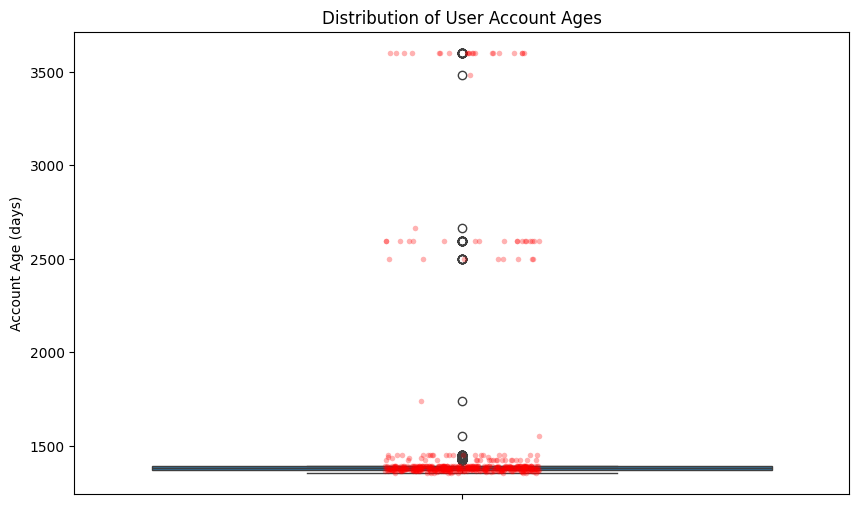


Summary Statistics for Account Age (days):
count     495.000000
mean     1544.218182
std       509.699019
min      1354.000000
25%      1372.000000
50%      1383.000000
75%      1392.000000
max      3601.000000
Name: account_age_days, dtype: float64

Oldest 5 accounts:
                      user_id             createdDate  account_age_days  \
475  54943462e4b07e684157a532 2014-12-19 14:21:22.381              3601   
476  54943462e4b07e684157a532 2014-12-19 14:21:22.381              3601   
477  54943462e4b07e684157a532 2014-12-19 14:21:22.381              3601   
478  54943462e4b07e684157a532 2014-12-19 14:21:22.381              3601   
479  54943462e4b07e684157a532 2014-12-19 14:21:22.381              3601   

            role  
475  fetch-staff  
476  fetch-staff  
477  fetch-staff  
478  fetch-staff  
479  fetch-staff  


In [52]:
# Convert createdDate to datetime if not already
# users['createdDate'] = pd.to_datetime(users['createdDate'])

# Calculate account age in days
users["account_age_days"] = (datetime.now() - users["createdDate"]).dt.days

# Create figure and axis
plt.figure(figsize=(10, 6))

# Create boxplot
sns.boxplot(y=users["account_age_days"])
plt.title("Distribution of User Account Ages")
plt.ylabel("Account Age (days)")

# Add individual points to see outliers
sns.stripplot(y=users["account_age_days"], color="red", alpha=0.3, size=4)

plt.show()

# Print summary statistics
print("\nSummary Statistics for Account Age (days):")
print(users["account_age_days"].describe())

# Look at oldest accounts
print("\nOldest 5 accounts:")
print(
    users.nlargest(5, "account_age_days")[
        ["user_id", "createdDate", "account_age_days", "role"]
    ]
)
